# Hypothesis Testing 

In the past lectures we have looked at how to estimate parameters and statistical measures such as sample mean and variance. Hypothesis testing is a method by which we can quantify the quality of our estimates. An important step in this method is defining the null and alternate hypothesis clearly. By doing so we can exactly interpret the results of the test.

In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

We can use hypothesis testing to see whether a coin is biased or not. Given a coin we can toss it $n$ times and count the number of heads we get. The null hypothesis is that the coins are unbiased, which means, $P(Heads)=P(Tails)=0.5$. The code below displays critical values for different alternate hypothesis. You can vary $n$ and significance level and see the change in the critical values.

In [2]:
 def hypothesisTesting(n,option,sig_level):
    pmf = binom.pmf(range(n+1),n=n,p=0.5)
    plt.figure(figsize=(12,8))
    plt.plot(range(n+1),pmf)
    plt.xlabel("Number of Heads",fontsize=18)
    plt.ylabel("Probability",fontsize=18)
    plt.title("The Binomial distribution under the null hypothesis",fontsize=18)
    plt.show()
    if option=="p > 0.5":
        k=binom.ppf(1-sig_level,n=n,p=0.5)
        print("Reject null hypothesis if number of heads is more than {}".format(k))
    elif option=="p < 0.5":
        k = binom.ppf(sig_level,n=n,p=0.5)-1
        print("Reject null hypothesis if number of heads is less than {}".format(k+1))
    elif option=="p ≠ 0":
        k1 = binom.ppf(1-sig_level/2,n=n,p=0.5)+1
        k2 = binom.ppf(sig_level/2,n=n,p=0.5)-1
        print("Reject null hypothesis if number of heads lies outside {} and {}".format(k2,k1))

style = {'description_width': 'initial'}
w_opt = widgets.Dropdown(options=["p > 0.5","p < 0.5","p ≠ 0"],description="Alternate Hypothesis:",style=style)
w_sig_level =  widgets.FloatSlider(value =0.05, min = 0., max = 0.5 , step=0.05, description="Significance level:",style=style)
w_n = widgets.IntSlider(value = 20, min = 10, max = 100, step = 5, style = style)
v = widgets.interact(hypothesisTesting,n=w_n,option = w_opt,sig_level=w_sig_level)
display(v)

interactive(children=(IntSlider(value=20, description='n', min=10, step=5, style=SliderStyle(description_width…

<function __main__.hypothesisTesting(n, option, sig_level)>

# Z-Test

In [3]:
import numpy as np
from scipy.stats import norm,t

Many a times we draw samples from the real world, and it is a common practice to assume the distribution to be Gaussian. In this section we will use the z-test to test this hypothesis.

Consider a random variable $X$ given by
$$X = Y*Z_1+(1-Y)*Z_2$$
Where $Y$ is a Bernoulli random variable ,and $Z_1$ and $Z_2$ are Gaussian random variables.Sampling $X$ is same as sampling $Z_1$ or $Z_2$ with probability $p$ and $1-p$ respectively.These kinds of models are called Gaussian Mixture Models. The following code generates a sample of $X$.

In [4]:
def sample(p = 0.5):
    Y = np.random.rand(1)
    if Y>=p:
        return np.random.normal(10,2)
    else:
        return np.random.normal(12,2)

To see what the distribution of $X$ looks like, let us generate 10000 samples and plot an estiamte of the distribution. 

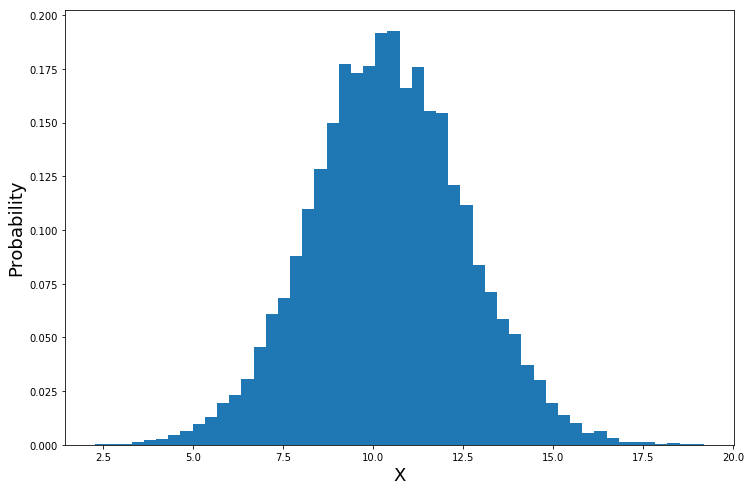

In [5]:
plt.figure(figsize=(12,8))
plt.hist(np.asarray([sample(0.2) for _ in range(10000)]),50,density=True)
plt.xlabel("X",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

The null hypothesis is that the $X$ is a Gaussian random variable with mean 10, the variance of this distribution is given as 4.The code given below allows us to vary the number of samples and calculate the p-values, for different cases of alternate hypothesis. Observe how the p-value changes with the number of samples.

In [6]:
def Z_test(n,test_type):
    samples = np.asarray([sample(0.2) for _ in range(n)])
    sample_mean = np.mean(samples)
    print("Sample mean:{:.4f}".format(sample_mean))
    mean = 10
    sigma = 2
    z = (sample_mean - mean)*np.sqrt(n)/sigma
    print("z-score:{:.4f}".format(z))
    if test_type=="μ > μ under null hypothesis":
        p = 1 - norm.cdf(z)
        print("p-value: {:.6f}".format(p))
    #elif test_type=="μ < μ under null hypothesis":
     #   p = norm.cdf(z)
      #  print("p-value : {}".format(p))
    elif test_type=="μ ≠ μ under null hypothesis":
        p = 2*(1-norm.cdf(np.abs(z)))
        print("p-value: {}".format(p))

w_opt = widgets.Dropdown(
    options=["μ > μ under null hypothesis","μ < μ under null hypothesis","μ ≠ μ under null hypothesis"],
    description = "Test type"
    )
w_n = widgets.IntSlider(value = 20, min = 10, max = 1000, step = 10)
v = widgets.interact(Z_test,n=w_n,test_type = w_opt)
display(v)

interactive(children=(IntSlider(value=20, description='n', max=1000, min=10, step=10), Dropdown(description='T…

<function __main__.Z_test(n, test_type)>

# T-Test 

We do the same test, but now assume that we do not know the variance beforehand, so we use the t-statistic. Observe how the p-values change with the number of samples.

In [7]:
def T_test(n,test_type):
    samples = np.asarray([sample(0.2) for _ in range(n)])
    sample_mean = np.mean(samples)
    S = np.std(samples,ddof=1)
    print("Sample mean:{:.4f}".format(sample_mean))
    mean = 10
    t_score = (sample_mean - mean)*np.sqrt(n)/S
    print("t-score:{:.4f}".format(t_score))
    if test_type=="μ > μ under null hypothesis":
        p = 1 - t.cdf(t_score,n-1)
        print("p-value: {:.6f}".format(p))
    # elif test_type=="μ < μ under null hypothesis":
    #    p = t.cdf(t_score,n-1)
    #    print("p-value : {}".format(p))
    elif test_type=="μ ≠ μ under null hypothesis":
        p = 2*(1-t.cdf(np.abs(t_score,n-1)))
        print("p-value: {}".format(p))

w_opt = widgets.Dropdown(
    options=["μ > μ under null hypothesis","μ < μ under null hypothesis","μ ≠ μ under null hypothesis"],
    description = "Test type"
    )
w_n = widgets.IntSlider(value = 20, min = 10, max = 1000, step = 10)
v = widgets.interact(T_test,n=w_n,test_type = w_opt)
display(v)

interactive(children=(IntSlider(value=20, description='n', max=1000, min=10, step=10), Dropdown(description='T…

<function __main__.T_test(n, test_type)>